### import libraries

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Simple Thresholding Based Image Binarization Algorithm

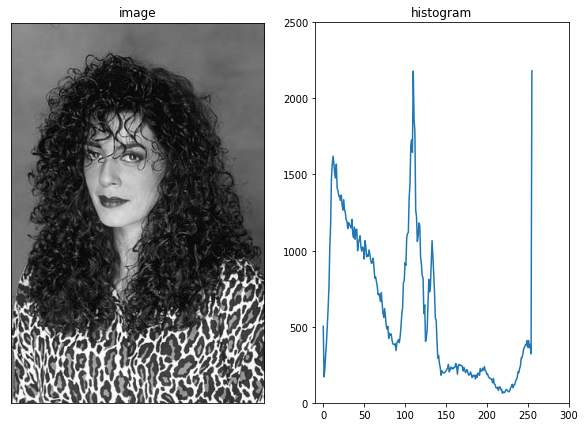

In [15]:
img_path = 'images/img.jpg'
# read the image
img = cv2.imread(img_path,0)
# create histogram
hist,bin = np.histogram(img.ravel(),256,[0,255])
no_of_pixels = img.shape[0]*img.shape[1]
plt.rcParams["figure.figsize"] = (10,7)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('image')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
hist,bin = np.histogram(img.ravel(),256,[0,255])
plt.xlim([-10,300])
plt.ylim([0, 2500])
plt.plot(hist)
plt.title('histogram')

plt.show()

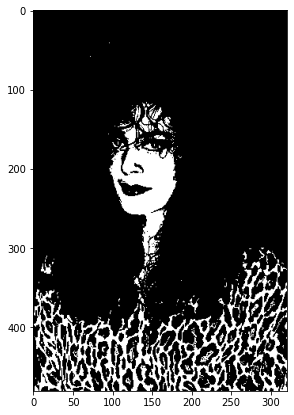

In [16]:
# threshold = 25
# threshold = 50 
# threshold = 75
# threshold = 110
threshold = 155
# threshold = 225

img_thres = img.copy()
img_thres[np.where(img_thres < threshold)] = 0
img_thres[np.where(img_thres > threshold)] = 255
plt.imshow(img_thres, cmap='gray')
plt.show()

    

## Otsu thresholding

final_thresh = 93


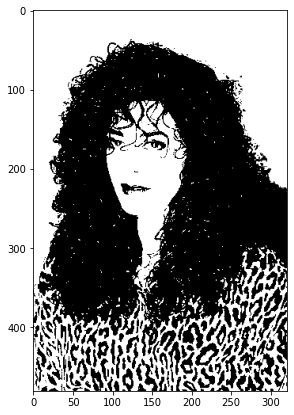

In [17]:
img_path = 'images/img.jpg'
# read the image
img = cv2.imread(img_path,0)

his, bins = np.histogram(img, np.arange(257)) 
final_thresh = -1
final_variance = -1
intensity_arr = np.arange(256)

for t in bins[1:-1]: 
    P1 = np.sum(his[:t]) / (img.shape[0] * img.shape[1])
    P2 = np.sum(his[t:]) / (img.shape[0] * img.shape[1])
    
    mua = np.sum(intensity_arr[:t]*his[:t]) / float(P1)
    mub = np.sum(intensity_arr[t:]*his[t:]) / float(P2)

    BC_variance = P1 * P2 * (mua - mub) ** 2 

    if BC_variance > final_variance:
        final_thresh = t
        final_variance = BC_variance

print('final_thresh =', final_thresh)
img_thres = img.copy()
img_thres[np.where(img_thres < final_thresh)] = 0
img_thres[np.where(img_thres > final_thresh)] = 255

plt.imshow(img_thres, cmap='gray')
plt.show()